# Heart Failure EDA & Prediction using Logistic Regression, SVM, RandomForest, XGBoost, and Neural Networks with Python 
  
  ## Table of Contents  
* [Introduction](#introduction)
* [Understanding the Dataset](#understand)
* [Exploratory Data Analysis](#EDA)
    - [Categorical Data](#categorical)
    - [Numerical Data](#numerical)
* [Outlier Detection](#outlier)
* [Predictive Analysis](#predictive)
    - [Data Preprocessing](#preprocessing)
    - [Logistic Regression](#lr)
    - [Support Vector Machines](#svm)
    - [RandomForest Classifier](#rf)
    - [XGBoost](#xgb)
    - [FeedForward Neural Networks](#nn)
* [Verdict](#verdict)


**IMPORTANT**  - Some of the code (Gridsearch) have been commented out because it takes a long time to run. You can try those parts by uncommenting the codeblocks.

<a id="introduction"></a>  
## Introduction

##### Importing the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


heart = pd.read_csv('../input/heart-failure-prediction/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<a id="understand"></a>  
#### Understanding what variables in the dataset means and their types
  1. Age - Age of the Patient - **Numerical**
  2. Sex - Gender of the Patient - **Categorical**
        * M - Male
        * F - Female
  3. ChestPainType - Floor is made of floor - **Categorical**
        * TA - [Typical Angina](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680106) - Substernal chest pain precipitated by physical exertion or emotional stress
        * ATA - [ATypical Angina](https://www.ncbi.nlm.nih.gov/medgen/149267) Angina pectoris which does not have associated classical symptoms of chest pain. Symptoms - weakness, nausea, or sweating
        * NAP - [Non-Anginal Chest Pain](https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain) - Pain in the chest that is NOT caused by Heart Disease or Heart Attack
        * ASY - [Asymptomatic](https://www.mayoclinic.org/diseases-conditions/heart-attack/expert-answers/silent-heart-attack/faq-20057777) - No symptoms
  4. RestingBP - [Resting Blood Pressure (mm/Hg)](https://www.medicinenet.com/blood_pressure_chart_reading_by_age/article.htm) - **Numerical**
  5. Cholesterol - [Serum Cholesterol (mm/dl)](https://www.medicalnewstoday.com/articles/321519) - **Numerical**
  6. FastingBS - [Fasting Blood Sugar](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451) - **Categorical (1: if FastingBS > 120 mg/dl, 0: otherwise)**
  7. RestingECG - Resting ElectroCardiogram Results - **Categorical**
        * Normal - [Normal ECG Reading](https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/) 
        * ST - [Abnormality in ST-T Wave Part of ECG](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial/68-causes-of-t-wave-st-segment-abnormalities) 
        * LVH - [Probable or definite Left Ventricular hypertrophy](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial/68-causes-of-t-wave-st-segment-abnormalities) 
  8. MaxHR - Maximum Heart Rate Achieved (60-202) - **Numeric**
  9. ExerciseAngina - [Exercise Induced Angina](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373) - When your Heart wants more blood,but narrowed arteries slow down the blood flow - **Categorical (Yes/No)**
  10. Oldpeak - [ST Depression](https://en.wikipedia.org/wiki/ST_depression) - **Numerical**
  11. ST_Slope - [Slope](https://pubmed.ncbi.nlm.nih.gov/3739881/) of the peak exercise ST Segment - **Categorical**
        * Up - Upward Slope
        * Flat - Slope is zero
        * Down - Downward Slope
  12. HeartDisease - Output Class - **Categorical (1: Heart Disease,0: Normal)**

In [2]:
#Shape of the dataset
print("Shape of the dataset is: "+str(heart.shape))
#Is there any null values in the data?
print("Amount of null values in data: "+ str(heart.isnull().sum().sum()))

Shape of the dataset is: (918, 12)
Amount of null values in data: 0


As we can see, there are 918 observations in the dataset. We don't have any missing data.

In [3]:
#Check balance of the output variables
heart.groupby(['HeartDisease'])['HeartDisease'].count()

HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64

We can see that there is a slight imbalance in our dataset. We'll use methods such as balancing the dataset by removing excess observations (Results in loss of data, Using performance metrics such as precision, Recall, F1-Score other than accuracy, etc..

<a id="EDA"></a>  
### Exploratory Data Analysis
<a id="categorical"></a>  
#### Categorical Variables

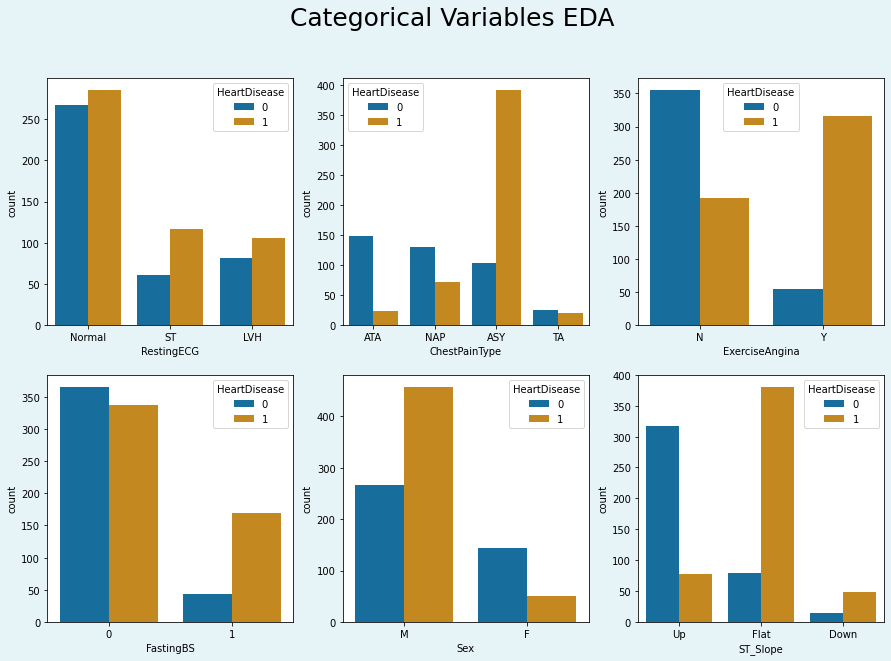

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_facecolor('lightblue')
fig.patch.set_alpha(0.3)

sns.countplot(x = heart['RestingECG'], data = heart, palette='colorblind', ax=axes[0,0],hue = "HeartDisease")
sns.countplot(x = heart['ChestPainType'], data = heart, palette='colorblind', ax=axes[0,1],hue = "HeartDisease")

sns.countplot(x = heart['ExerciseAngina'], data = heart, palette='colorblind', ax=axes[0,2],hue = "HeartDisease")
sns.countplot(x = heart['FastingBS'], data = heart, palette='colorblind', ax=axes[1,0],hue = "HeartDisease")
sns.countplot(x = heart['Sex'], data = heart, palette='colorblind', ax=axes[1,1],hue = "HeartDisease")
sns.countplot(x = heart['ST_Slope'], data = heart, palette='colorblind', ax=axes[1,2],hue = "HeartDisease")
plt.suptitle('Categorical Variables EDA', fontsize=25)
plt.show()

##### Decoding these plots can be somewhat tricky.  
We had more data for people with heart disease than not. So, small differences between two hues are ignored. After carefully analysing these plots, we can get following insights,
* People with ST-T wave abnormalities are more likely to have a heart disease.
* There is an alarmingly high amount of patients with Asymptomatic heart diseases.
* People who get Exercise induced Angina are more likely to have a heart disease.
* People with high fasting blood sugar levels are more likely to have a heart disease.
* Men are more likely to get heart diseases than women.
* People with flat or down ST_Slope are more likely to have a heart disease.

<a id="numerical"></a>  
#### Numerical Variables

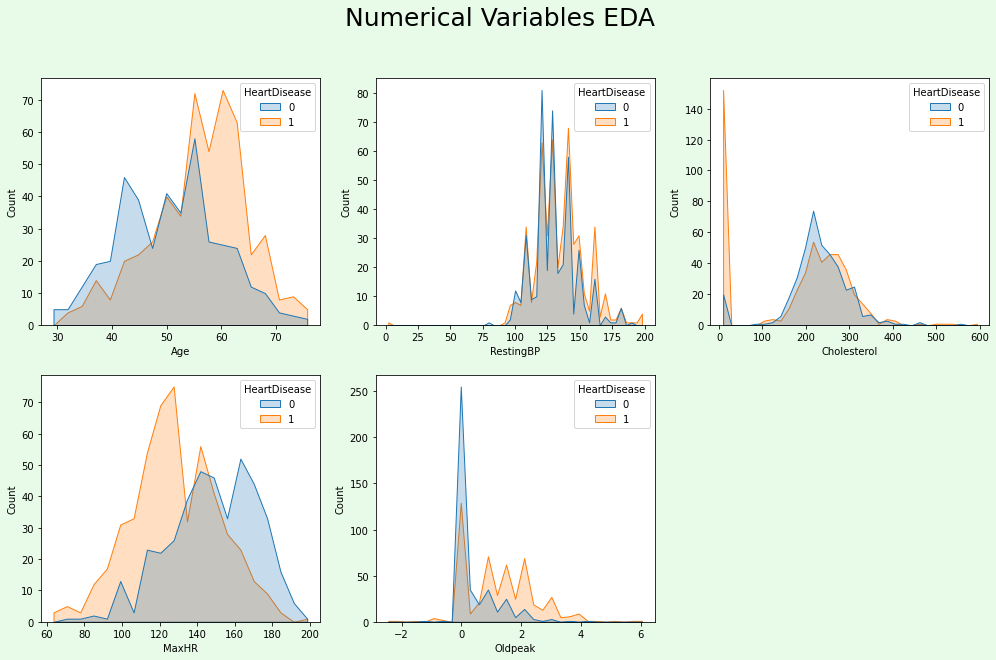

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))
fig.patch.set_facecolor('lightgreen')
fig.patch.set_alpha(0.2)

sns.histplot(data = heart,x = heart['Age'],hue = "HeartDisease",element="poly",ax=axes[0,0])
sns.histplot(data = heart,x = heart['RestingBP'],hue = "HeartDisease",element="poly",ax=axes[0,1])
sns.histplot(data = heart,x = heart['Cholesterol'],hue = "HeartDisease",element="poly",ax=axes[0,2])
sns.histplot(data = heart,x = heart['MaxHR'],hue = "HeartDisease",element="poly",ax=axes[1,0])
sns.histplot(data = heart,x = heart['Oldpeak'],hue = "HeartDisease",element="poly",ax=axes[1,1])
fig.delaxes(axes[1][2])
plt.suptitle('Numerical Variables EDA', fontsize=25)
plt.show()

We can get following insights from Numerical variables,
* People tend to get more susceptible to heart diseases as they get older.
* Resting blood pressures of people with and without heart diseases are kinda similar. Maybe Resting BP is slightly higher for people with heart disease.
* **There are unusually high amount of people with zero cholesterol level. This might be a error in data. We have to see about that while considering variables for Machine Learning.**
* Maximum heart rate is lower (Highest count is around 120) for most people with heart diseases. Healthy (No heart Disease) people tend to have higher Maximum Heart Rate.
* ST wave depression peak value is generally higher for people with heart disease.

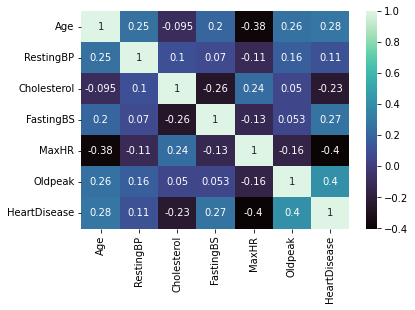

In [6]:
# Correlation heatmap for Numerical and Binary Variables
sns.heatmap(heart.corr(), annot=True, cmap='mako')
plt.show()

<a id="outlier"></a>  
#### Outlier Detection
Now, We can try to find Outliers from Numerical Variables and determine whether they should be removed or not.

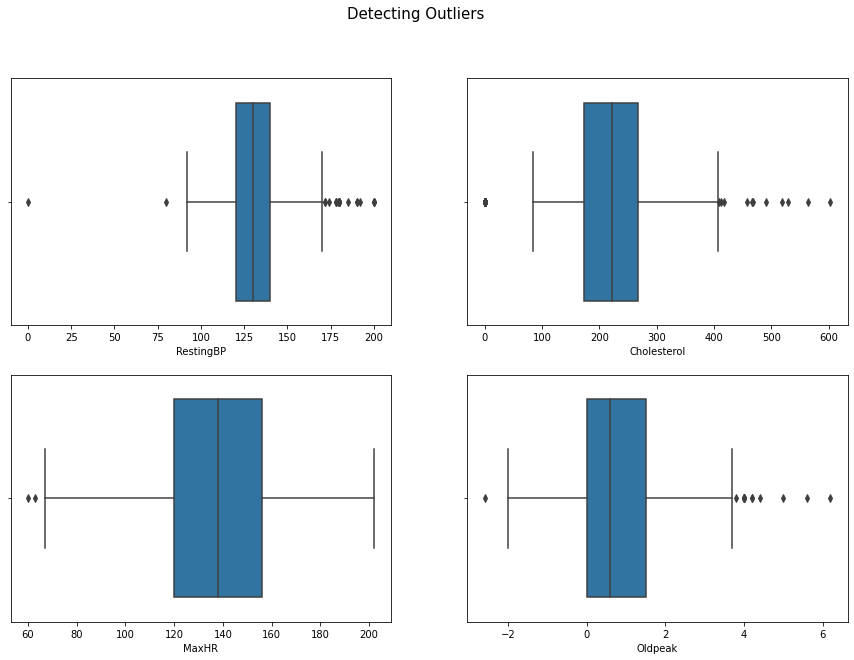

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=heart['RestingBP'],ax=axes[0,0])
sns.boxplot(x=heart['Cholesterol'],ax=axes[0,1])
sns.boxplot(x=heart['MaxHR'],ax=axes[1,0])
sns.boxplot(x=heart['Oldpeak'],ax=axes[1,1])
plt.suptitle("Detecting Outliers",fontsize = 15)
plt.show()

**Resting Blood Pressure**

In [8]:
#It is impossible to have a resting heart bloop pressure of zero.
print((heart['RestingBP']==0).sum())

#We need to impute this datapoint (not the whole row). I will do this with the median Resting blood pressure
for i in heart['RestingBP']:
    if i == 0:
        heart['RestingBP'] = heart['RestingBP'].replace(i, heart['RestingBP'].median())

#Checking if high BP has a correlation with the outcome
qHigh = heart['RestingBP'].quantile(0.80)
print("High Resting BP on Heart Disease: ")
print(heart[(heart['RestingBP'] >= qHigh)].value_counts(heart['HeartDisease']))

#We can see that there is a increase in heart disease with high RestingBP. So we will not change this outliers.

1
High Resting BP on Heart Disease: 
HeartDisease
1    130
0     66
dtype: int64


**Cholesterol**

In [9]:
#Low cholesterol levels seems suspicious. But there are many datapoints.
print((heart['Cholesterol']==0).sum())
#Check correlation of heart disease with zero cholesterol level.
print("Zero Cholesterol on Heart Disease: ")
print(heart[(heart['Cholesterol'] == 0)].value_counts(heart['HeartDisease']))

#BUTTT, WE CAN SEE THAT IT HEART DISEASE IS COMMON WITH VERY LOW CHOLESTEROL LEVELS SO WE will keep the data.


172
Zero Cholesterol on Heart Disease: 
HeartDisease
1    152
0     20
dtype: int64


**Maximum Heart Rate**

In [10]:
#There are some rows with very low maximum heart rates. Lets see how it affects the Heart disease
print("Low Maximum Heart Rate on Heart Disease: ")
print(heart[(heart['MaxHR'] <= 75)].value_counts(heart['HeartDisease']))
#WE CAN SEE THAT LOW MaxHR is ASSOCIATED WITH Heart Disease. So we will not touch this datapoints

Low Maximum Heart Rate on Heart Disease: 
HeartDisease
1    8
0    1
dtype: int64


**OldPeak**

In [11]:
#There are some rows with very low and very high Old peaks. Lets see how it affects the Heart diseas
print("Low Oldpeak on Heart Disease: ")
print(heart[(heart['Oldpeak'] <= -1)].value_counts(heart['HeartDisease']))

print("High Oldpeak on Heart Disease: ")
print(heart[(heart['Oldpeak'] >= 3.5)].value_counts(heart['HeartDisease']))

# We can see that very low and very high old peaks are associated with Heart Disease. 

Low Oldpeak on Heart Disease: 
HeartDisease
1    5
0    1
dtype: int64
High Oldpeak on Heart Disease: 
HeartDisease
1    20
0     2
dtype: int64


<a id="predictive"></a>  
### Predictive Analysis

<a id="preprocessing"></a>  
#### Data Preprocessing

In [12]:
#Setting up X and y Variables
X = heart.iloc[:,0:-1] # All columns except HeartDisease Columnn
y = heart.iloc[:,-1] # HeartDisease Column

In [13]:
#One Hot Encoding using Pandas Get Dummies function
X = pd.get_dummies(X, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], 
                   drop_first=True) #We dont need to encode Fasting BS because it's already in a 0 or 1 format
#drop_first = true to avoid dummy variable trap. We are removing one encoded column from every categorical variable
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [14]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

<a id="lr"></a>  
#### Logistic Regression

In [15]:
#For Logistics Regression we dont need to scale data manually
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear',random_state =0)
#If you dont include solver='liblinear', you'll get an error for some reason (This doesnt happen when i do it offline)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

Accuracy:  0.837
F1 Score:
  0.8660714285714286
Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.74      0.79        77
           1       0.83      0.91      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.83       184



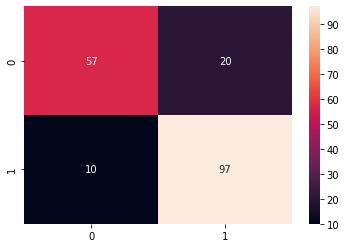

In [16]:
#Confusion Matrix and Accuracy
from sklearn.metrics import accuracy_score, f1_score,classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
accuracy = round(accuracy_score(y_test,y_pred),4)
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,y_pred)
print("F1 Score:\n ",f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n ",report)

In [17]:
#Using KFold Cross Validation
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
from sklearn.model_selection import cross_validate
scores = cross_validate(LogisticRegression(solver='liblinear',random_state =0), 
                        X, y, cv=cv,scoring = ['accuracy','f1_macro','precision','recall'])

print('Accuracy: %.4f (std: %.3f)' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))
print('F1 Score : %.4f' % (np.mean(scores['test_f1_macro'])))
print('Precision : %.4f' % (np.mean(scores['test_precision'])))
print('Recall : %.4f' % (np.mean(scores['test_recall'])))

Accuracy: 0.8594 (std: 0.032)
F1 Score : 0.8571
Precision : 0.8668
Recall : 0.8819


<a id="svm"></a>  
#### Support Vector Machines (Classification)

In [18]:
# Feature Scaling is needed
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
'''
LOG - #We will only scale numerical X values and concat that with categorical part (Excluding FastingBS im too lazy lol)
Turns out this don't work very well..., Scaling all variables equaly performs better (Done below)
This vs Equal Scaling Results are as below(F1 Score),
SVC (grid search) - 0.8424 vs 0.8533
RandomForest (grid_search) - 0.8501 vs 0.8501
NN (grid_search) - It changes a lot LMAO
X_scaled = pd.concat([pd.DataFrame(sc.fit_transform(X.iloc[:,0:6]),columns = X.columns[0:6]),X.iloc[:,6:]],axis = 1)
'''
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
X_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.415002,0.825070,-0.551341,1.382928,-0.832432,0.515952,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
1,-0.478484,1.527329,-0.171961,-0.551341,0.754157,0.105664,-1.938163,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,0.997824,-0.869056
2,-1.751359,-0.141161,0.770188,-0.551341,-1.525138,-0.832432,0.515952,2.075177,-0.532838,-0.229679,-1.228087,2.038947,-0.823556,-1.002181,1.150674
3,-0.584556,0.303769,0.139040,-0.551341,-1.132156,0.574711,-1.938163,-0.481887,-0.532838,-0.229679,0.814275,-0.490449,1.214246,0.997824,-0.869056
4,0.051881,0.971166,-0.034755,-0.551341,-0.581981,-0.832432,0.515952,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674


Accuracy:  0.8533
F1 Score:
  0.8778280542986425
Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



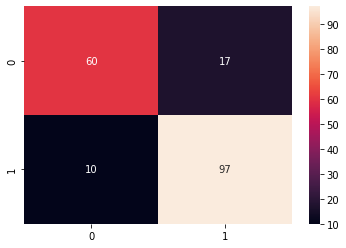

In [19]:
#Simple Model
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
accuracy = round(accuracy_score(y_test,y_pred),4)
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,y_pred)
print("F1 Score:\n ",f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n ",report)

In [20]:
#It's already better than  Logistic Regression even with stock parameters (C=1,rbf,degree = 3,gamma = scale)

#Now I will Optimize Hyperparameters
from sklearn.model_selection import GridSearchCV
'''
params = [ {'C':[1, 10, 100,1000], 'kernel':['linear']},
               {'C':[1, 10, 100,1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,'scale']},
               {'C':[1, 10, 100,1000], 'kernel':['poly'], 'degree': [2,3,4,5] ,'gamma':[0.01,0.02,0.03,0.04,0.05,'scale']},
                {'C':[1, 10, 100,1000], 'kernel':['sigmoid']}
              ]
grid = GridSearchCV(estimator = svm,  
                           param_grid = params,
                           scoring = 'f1', #F1 because false positives and false negatives are crucial
                           cv = 5,
                           verbose=0)
grid.fit(X_scaled,y)
'''

"\nparams = [ {'C':[1, 10, 100,1000], 'kernel':['linear']},\n               {'C':[1, 10, 100,1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,'scale']},\n               {'C':[1, 10, 100,1000], 'kernel':['poly'], 'degree': [2,3,4,5] ,'gamma':[0.01,0.02,0.03,0.04,0.05,'scale']},\n                {'C':[1, 10, 100,1000], 'kernel':['sigmoid']}\n              ]\ngrid = GridSearchCV(estimator = svm,  \n                           param_grid = params,\n                           scoring = 'f1', #F1 because false positives and false negatives are crucial\n                           cv = 5,\n                           verbose=0)\ngrid.fit(X_scaled,y)\n"

In [21]:
#y_pred = grid.predict(X_test_scaled)
#cm = confusion_matrix(y_test,y_pred)
#accuracy = round(accuracy_score(y_test,y_pred),4)
#print("Accuracy: ",accuracy)# 0.8913
#sns.heatmap(cm,annot=True,fmt = 'g')
#Getting Best Scores and Best Parameters
#print("Best Score: ", grid.best_score_) #F1 - 0.8529593322446811 , Accuracy  - 0.8913
#print("Best Parameters : ", grid.best_params_) #  {'C': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

Accuracy:  0.7989
F1 Score:
  0.8412017167381974
Classification Report:
                precision    recall  f1-score   support

           0       0.84      0.64      0.73        77
           1       0.78      0.92      0.84       107

    accuracy                           0.80       184
   macro avg       0.81      0.78      0.78       184
weighted avg       0.81      0.80      0.79       184



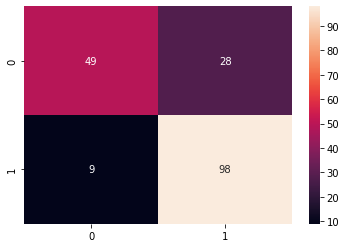

In [23]:
#Creating a model according to best parameters 
svm = SVC(C = 1,degree = 5,kernel = 'poly',gamma = 'scale',random_state=1)
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
accuracy = round(accuracy_score(y_test,y_pred),4)
print("Accuracy: ",accuracy) # Accuracy & F1 we get here is lower than grid search model probably due to less avalable data
f1 = f1_score(y_test,y_pred)
print("F1 Score:\n ",f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n ",report)

<a id="rf"></a>  
#### Random Forest Classifier

In [24]:
#I will start with Grid Search (Takes so long to run)
from sklearn.ensemble import RandomForestClassifier 
'''
RF = RandomForestClassifier(random_state = 0)
params = { 
    'n_estimators': [10,20,30,50,100,200,300,400,500,750,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,None],
    'criterion' :['gini', 'entropy']
}
grid_RF = GridSearchCV(estimator = RF,  
                           param_grid = params,
                           scoring = 'f1', #F1 because false positives and false negatives are crucial
                           cv = 5,
                           verbose=0)
grid_RF.fit(X_scaled,y)

y_pred = grid_RF.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
'''

"\nRF = RandomForestClassifier(random_state = 0)\nparams = { \n    'n_estimators': [10,20,30,50,100,200,300,400,500,750,900],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8,None],\n    'criterion' :['gini', 'entropy']\n}\ngrid_RF = GridSearchCV(estimator = RF,  \n                           param_grid = params,\n                           scoring = 'f1', #F1 because false positives and false negatives are crucial\n                           cv = 5,\n                           verbose=0)\ngrid_RF.fit(X_scaled,y)\n\ny_pred = grid_RF.predict(X_test_scaled)\ncm = confusion_matrix(y_test,y_pred)\nsns.heatmap(cm,annot=True)\n"

In [ ]:
#Getting Best Scores and Best Parameters
#print("Best Score: ", grid_RF.best_score_) #0.8500657209209763
#accuracy = round(accuracy_score(y_test,y_pred),4) #0.8478
#print("Accuracy: ",accuracy)# 0.8913
#print("Best Parameters : ", grid_RF.best_params_) #  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 20

Accuracy:  0.837
F1 Score:
  0.8648648648648648
Classification Report:
                precision    recall  f1-score   support

           0       0.84      0.75      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



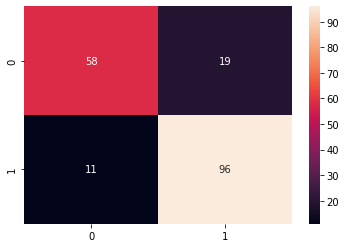

In [25]:

#Creating a model according to best parameters
RF = RandomForestClassifier(criterion = 'entropy',max_depth = 4,max_features = 'auto',n_estimators = 20,random_state=0)
RF.fit(X_train_scaled,y_train)
y_pred = RF.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
accuracy = round(accuracy_score(y_test,y_pred),4)
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,y_pred)
print("F1 Score:\n ",f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n ",report)

<a id="xgb"></a>  
#### XGBoost Classifier

In [26]:
#I will start with Grid Search (Takes so long to run)

from xgboost import XGBClassifier
'''
xgb = XGBClassifier(random_state = 0,verbosity = 0,use_label_encoder = False)
#{'booster':['gblinear'],'lambda':[0.01, 0.1, 0.5],'updater':['shotgun','coord_descent'],
               # 'feature_selector':['cyclic','shuffle'],'top_k':[0,1,2,3,4,5]},
params = [ {'learning_rate':[0.01, 0.1, 0.2,0.3,0.4], 'booster':['gbtree'], 'min_split_loss':[0,0.01,0.1],
                   'max_depth':[3,4,5,6,7,8,9]},
               {'learning_rate':[0.01, 0.1, 0.2,0.3,0.4], 'booster':['dart'], 'min_split_loss':[0,0.01,0.1],
                   'max_depth':[3,4,5,6,7,8,9]}
              ]
grid_xg = GridSearchCV(estimator = xgb,  
                           param_grid = params,
                           scoring = 'f1', #F1 because false positives and false negatives are crucial
                           cv = 5,
                           verbose=0)
grid_xg.fit(X_scaled,y)

y_pred = grid_xg.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt = 'g')
'''

"\nxgb = XGBClassifier(random_state = 0,verbosity = 0,use_label_encoder = False)\n#{'booster':['gblinear'],'lambda':[0.01, 0.1, 0.5],'updater':['shotgun','coord_descent'],\n               # 'feature_selector':['cyclic','shuffle'],'top_k':[0,1,2,3,4,5]},\nparams = [ {'learning_rate':[0.01, 0.1, 0.2,0.3,0.4], 'booster':['gbtree'], 'min_split_loss':[0,0.01,0.1],\n                   'max_depth':[3,4,5,6,7,8,9]},\n               {'learning_rate':[0.01, 0.1, 0.2,0.3,0.4], 'booster':['dart'], 'min_split_loss':[0,0.01,0.1],\n                   'max_depth':[3,4,5,6,7,8,9]}\n              ]\ngrid_xg = GridSearchCV(estimator = xgb,  \n                           param_grid = params,\n                           scoring = 'f1', #F1 because false positives and false negatives are crucial\n                           cv = 5,\n                           verbose=0)\ngrid_xg.fit(X_scaled,y)\n\ny_pred = grid_xg.predict(X_test_scaled)\ncm = confusion_matrix(y_test,y_pred)\nsns.heatmap(cm,annot=True,fmt = 'g

In [ ]:
#Getting Best Scores and Best Parameters
#print("Best Score: ", grid_xg.best_score_) #0.839683048346517
#accuracy = round(accuracy_score(y_test,y_pred),4) #0.9076
#print("Accuracy: ",accuracy)# 0.9076
#print("Best Parameters : ", grid_xg.best_params_) #  {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3, 'min_split_loss': 0}

Accuracy:  0.8587
F1 Score:
  0.8818181818181818
Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.79      0.82        77
           1       0.86      0.91      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



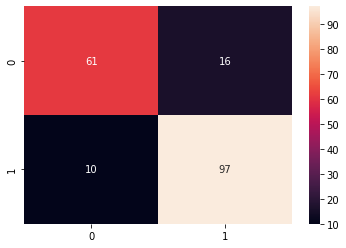

In [27]:
#Creating a model according to best parameters
xgb = XGBClassifier(booster = 'gbtree',learning_rate = 0.1,max_depth = 3,
                             min_split_loss = 0,random_state=0,verbosity = 0,use_label_encoder = False)
xgb.fit(X_train_scaled,y_train)
y_pred = xgb.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
accuracy = round(accuracy_score(y_test,y_pred),4)
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,y_pred)
print("F1 Score:\n ",f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n ",report)

<a id="nn"></a>  
### Feedforward Artificial Neural Networks

In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import callbacks

##### Simple Model

In [30]:
#Simple Model
simpleModel = Sequential(
    [
        Dense(units = 15, activation="relu",input_dim = 15),
        Dense(7, activation="relu"),
        Dense(4,activation = 'relu'),
        Dense(1,activation = 'sigmoid') #output layer
    ]
)
simpleModel.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['binary_accuracy'])

simpleHistory = simpleModel.fit(X_train_scaled,y_train,epochs = 1000 ,batch_size = 100,verbose = 0)

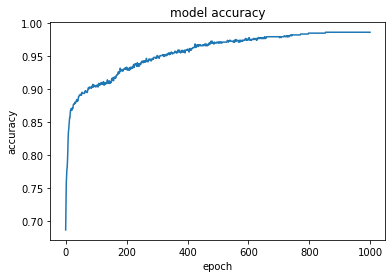

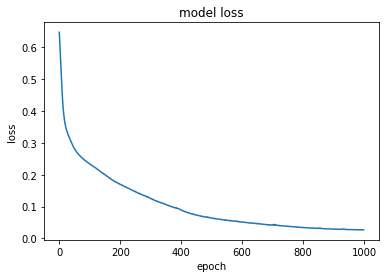

In [31]:
# summarize history for accuracy
plt.plot(simpleHistory.history['binary_accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(simpleHistory.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

Looks like we need more regularization.

Accuracy:  0.8043
F1 Score:
  0.8317757009345794
Classification Report:
                precision    recall  f1-score   support

           0       0.77      0.77      0.77        77
           1       0.83      0.83      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



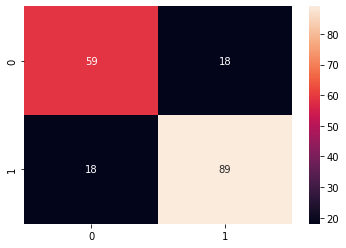

In [32]:
y_pred = simpleModel.predict(X_test_scaled)
#print(y_pred)
y_pred = y_pred>0.1
#print(y_pred)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
accuracy = round(accuracy_score(y_test,y_pred),4)
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,y_pred)
print("F1 Score:\n ",f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n ",report)

##### Tuned Model

[Swish](https://medium.com/@neuralnets/swish-activation-function-by-google-53e1ea86f820) Activation function performs slightly better than ReLU.

In [33]:
def baseline_model():
    model = Sequential(
    [
        Dense(units = 15, activation='swish',input_dim = 15),
        Dense(10, activation="swish"),
        Dropout(0.1),
        Dense(7,activation = 'swish'),
        Dropout(0.2),
        Dense(1,activation = 'sigmoid') #output layer
    ]
    )
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = metrics.BinaryAccuracy(threshold = 0.6))
    return model

model  = baseline_model()

#Using early stopping to counter overfitting
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=0,
                                        patience=30) #patience is number of epochs to wait after min monitoring variable

history = model.fit(X_train_scaled,y_train,validation_data = (X_test_scaled,y_test),
                    epochs = 500 ,batch_size = 200,verbose = 0,callbacks =[earlystopping])


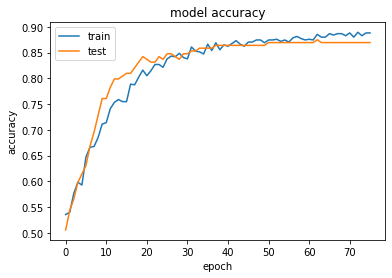

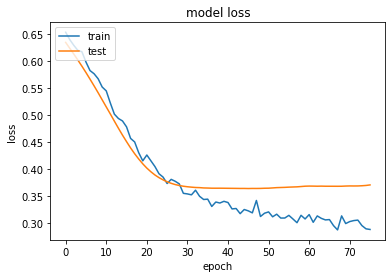

Best Accuracy:  0.8695652173913043 at threshold:  0.5499999999999999
Accuracy:  0.8696
F1 Score:
  0.890909090909091
Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.81      0.84        77
           1       0.87      0.92      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



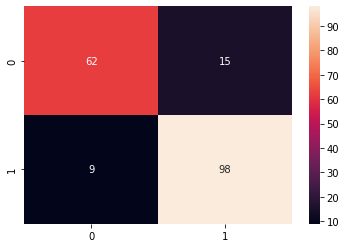

In [34]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = model.predict(X_test_scaled)
#print(y_pred)

i = 0
maxacc = 0;
bestthres = 0;
while i <1:
    y_pred_thres = y_pred>i
    accuracy  = accuracy_score(y_test, y_pred_thres)
    if maxacc< accuracy:
        maxacc = accuracy
        bestthres = i;
    i=i+0.05
print("Best Accuracy: ",maxacc,"at threshold: ",bestthres)

y_pred = y_pred>bestthres

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='g')
accuracy = round(accuracy_score(y_test,y_pred),4)
print("Accuracy: ",accuracy)
f1 = f1_score(y_test,y_pred)
print("F1 Score:\n ",f1)
report = classification_report(y_test,y_pred)
print("Classification Report:\n ",report)

In [35]:
#K-Fold Cross Validation
estimator = KerasClassifier(build_fn=baseline_model, epochs=500, batch_size=200,verbose = 0)

kfold = KFold(n_splits=10, shuffle=True)
results = cross_validate(estimator, X_scaled, y, cv=kfold,scoring = ['accuracy','f1_macro','precision','recall'],
                         fit_params={'callbacks':earlystopping})
print('Accuracy: %.4f (std: %.3f)' % (np.mean(results['test_accuracy']), np.std(results['test_accuracy'])))
print('F1 Score : %.4f (std: %.3f)' % (np.mean(results['test_f1_macro']) ,np.std(results['test_f1_macro'])))
print('Precision : %.4f' % (np.mean(results['test_precision'])))
print('Recall : %.4f' % (np.mean(results['test_recall'])))

Accuracy: 0.8399 (std: 0.043)
F1 Score : 0.8365 (std: 0.046)
Precision : 0.8539
Recall : 0.8635


<a id="verdict"></a>  
### Verdict   
  
  With these results, It's clear that using neural networks might not be the best idea for this dataset. This is probably due to the limited amount of data we have. Most of the models performs pretty similar to each other. XGBoost (Grid Search) acheives the best accuracy but f1 score is not optimal. Feedforward Neural Networks model acheives better F1 Scores.